<a href="https://www.kaggle.com/code/amuhialdeen/transformer-sentiment-model-movie-reviews?scriptVersionId=156570101" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import zipfile
from collections import Counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv
/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip
/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip
/kaggle/input/dejavusans-bold/DejaVuSans-Bold.ttf


In [2]:
!pip install seaborn wordcloud nltk

In [3]:
import seaborn as sns
from wordcloud import WordCloud

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [5]:
dataset_path = "/kaggle/working/"
font = "/kaggle/input/dejavusans/DejaVuSans-Bold.ttf"

## Extract zip files

In [6]:
def extract_file(path):
    with zipfile.ZipFile(path,'r') as zipref:
        zipref.extractall('./data')

In [7]:
paths = [
    '/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip',
    '/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip', 
]
_ = [extract_file(path) for path in paths]

# Explore Data

In [8]:
df = pd.read_csv('./data/train.tsv', sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


**The sentiment labels are:**
* 0 - negative
* 1 - somewhat negative
* 2 - neutral
* 3 - somewhat positive
* 4 - positive

In [9]:
df['Sentiment'].unique()

array([1, 2, 3, 4, 0])

## Distribution sentiment classes

### Plot handlers

In [10]:
def shpw_distplot(_df, feature):
    plt.figure(figsize=(8, 6))
    sns.distplot(_df[feature], bins=10, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()

In [11]:
def generate_wordcloud(all_words, feature, label="Most used words in"):
    # Generate word cloud
    wordcloud = WordCloud(width = 1000, height = 500, font_path=f'{font}/DejaVuSans-Bold.ttf').generate(' '.join(all_words))

    # Plot word cloud
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.title(f"{label} {feature}", size=16)
    plt.axis("off")
    plt.show()

In [12]:
def show_word_ferq(_df, feature, top_words=10):
  # Get the top 10 most common words
  words = ' '.join(_df[feature]).split()
  word_counts = Counter(words)
  top_words = word_counts.most_common(top_words)

  # Separate the words and their counts
  words, counts = zip(*top_words)

  # Create the bar plot
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
  ax1.bar(words, counts)
  ax1.set_title(f"{feature} Word Frequency")

  ax2.bar(words, np.log10(counts))
  ax2.set_title(f"{feature} Word Frequency (Log10 Adjusted)")
  plt.show()

In [13]:
def getAllWords(_df, feature):
    return pd.Series(' '.join(str(_df[feature]).split()))

In [14]:
def show_sentiment_distribution(_df, feature):
    # Count the occurrences of each unique sentiment category
    sentiment_counts = _df[feature].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Sentiment Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Show the pie chart
    plt.show()

**Distribution Plot for Sentiment**

In [15]:
feature_target = 'Sentiment'

/tmp/ipykernel_27/19030082.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(_df[feature], bins=10, kde=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


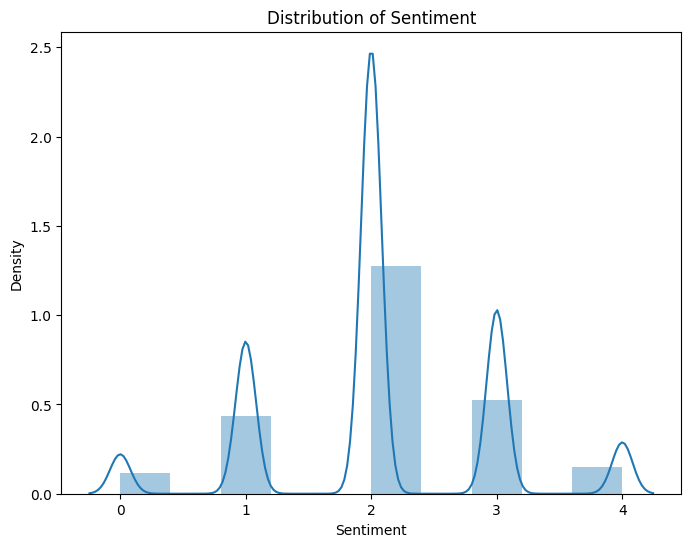

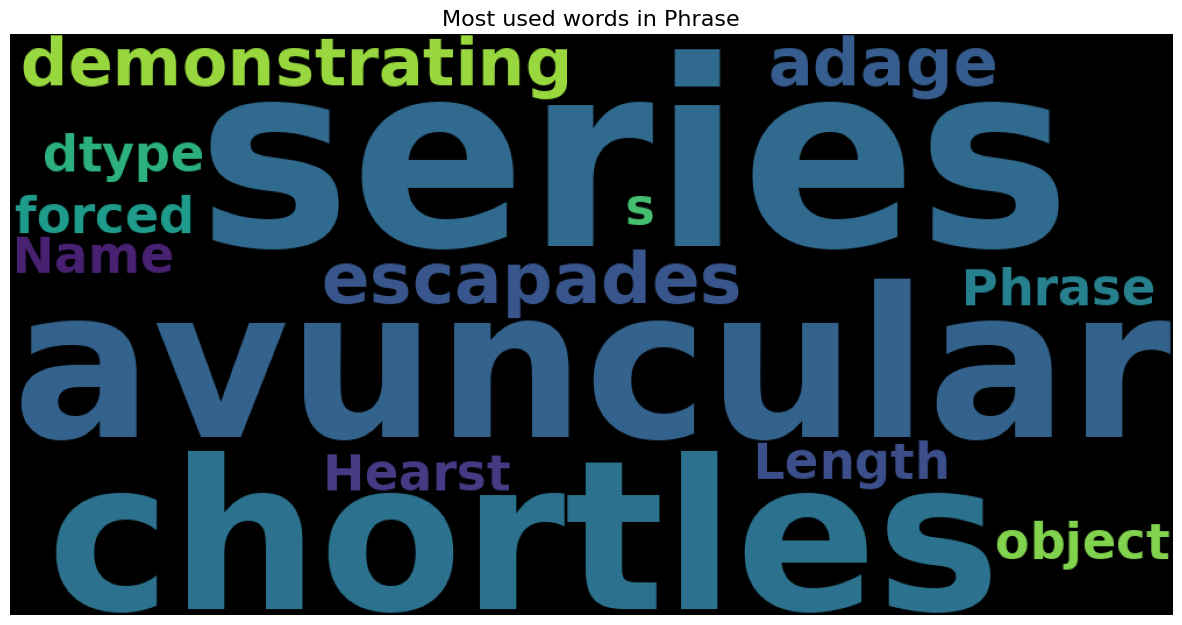

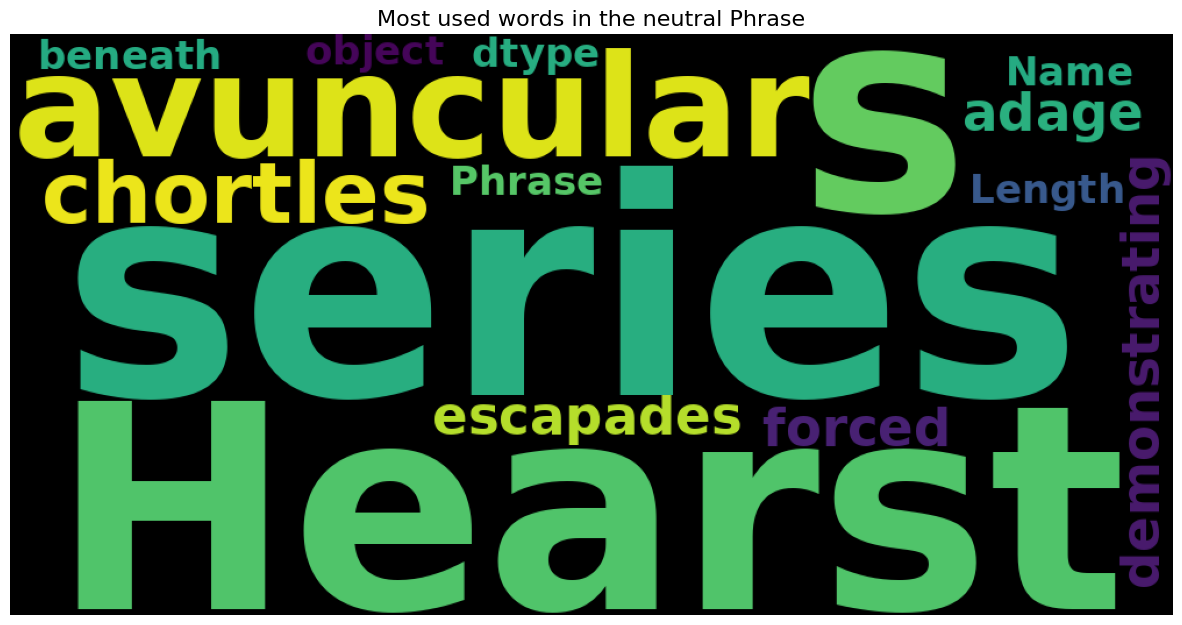

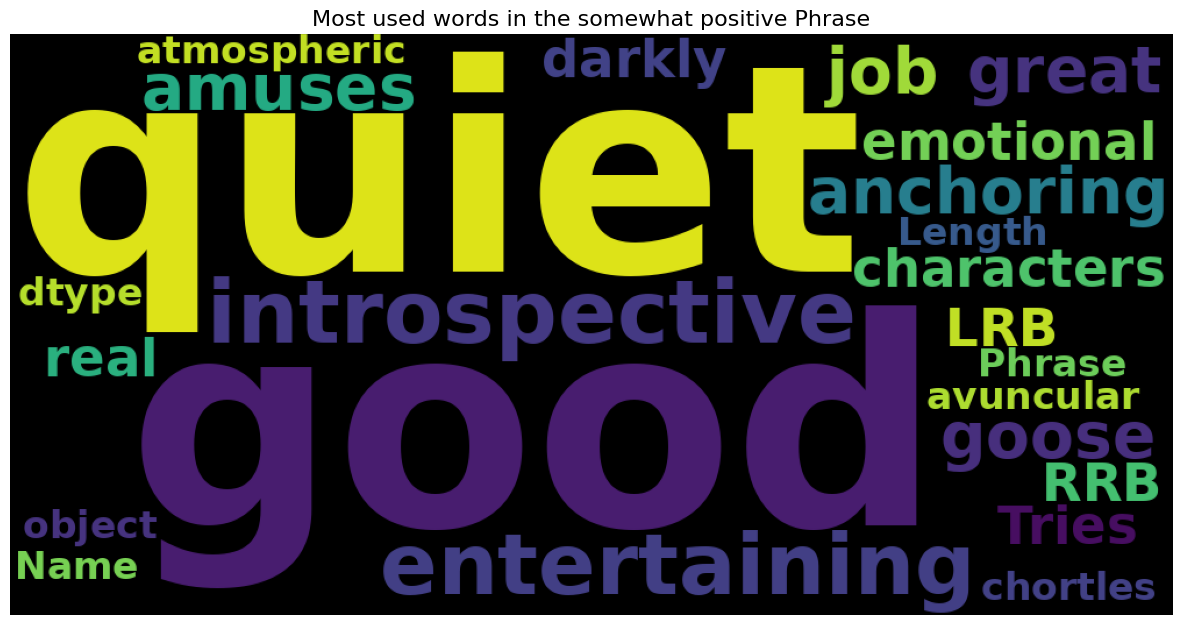

In [16]:
shpw_distplot(df, feature_target)

# get all words for phrase column
all_words = getAllWords(df, 'Phrase')

# show the word cloud
generate_wordcloud(all_words, 'Phrase')

# get all words for neutral
all_words_neutral = getAllWords(df[df[feature_target] == 2], 'Phrase')

# show the word cloud for neutral
generate_wordcloud(all_words_neutral, 'Phrase', 'Most used words in the neutral')

# get all words for somewhat positive
all_words_somewhat_positive = getAllWords(df[df[feature_target] == 3], 'Phrase')

# show the word cloud for neutral
generate_wordcloud(all_words_somewhat_positive, 'Phrase', 'Most used words in the somewhat positive')

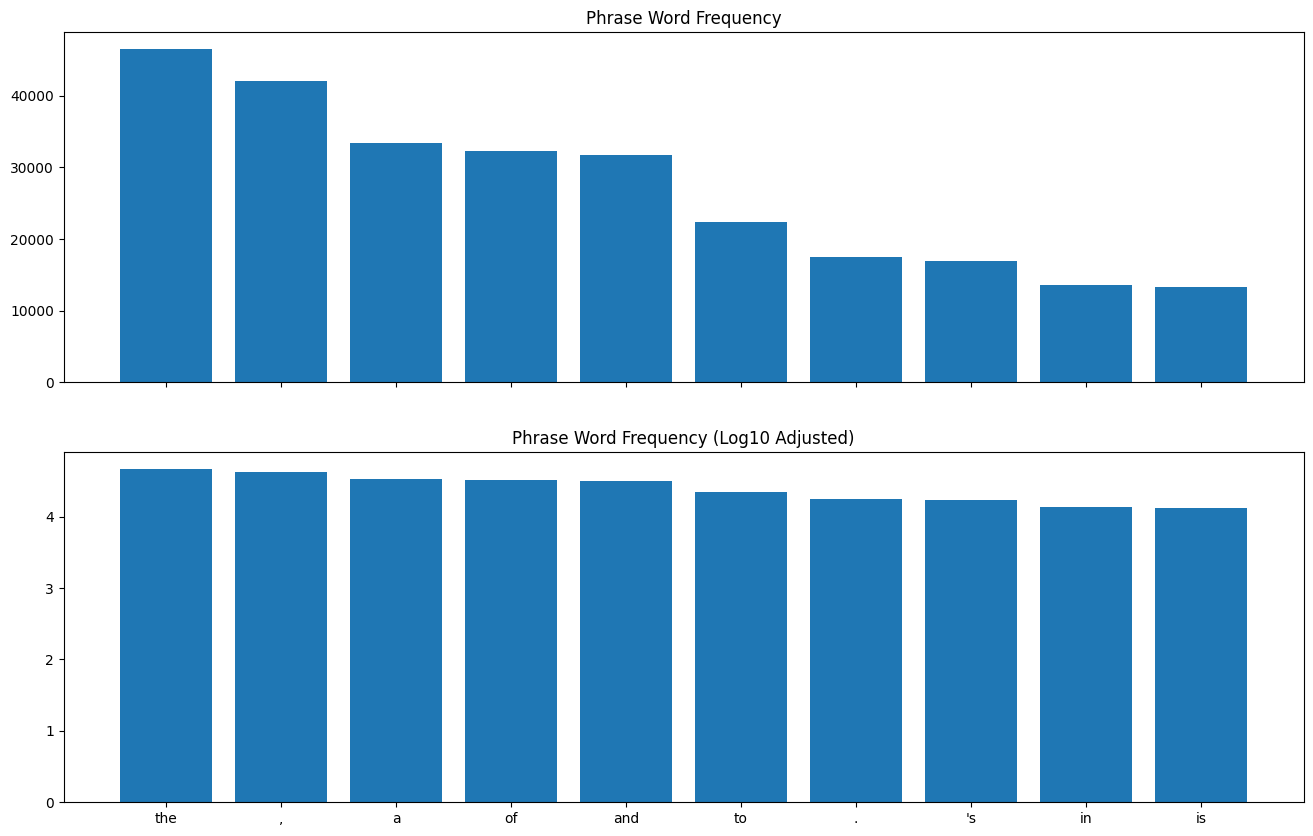

In [17]:
show_word_ferq(df, 'Phrase')

we can see that there is ',' and '.' we should remove the stop words to see the words correctly

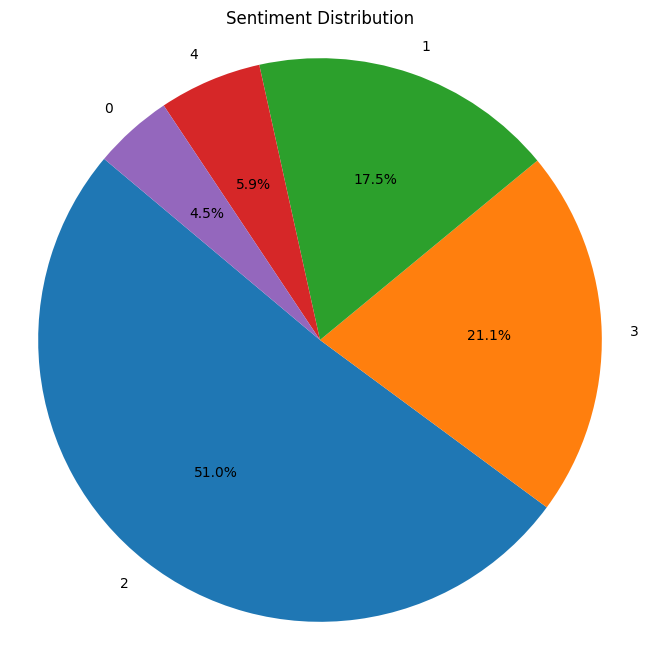

In [18]:
show_sentiment_distribution(df, feature_target)

# Preprocess Data

## Preprocess utils handlers

### Check for nan handler

In [19]:
# check_for_nan for many features
def check_for_nan(_df, features=[]):
    [print(f"{feature} has {_df[feature].isnull().sum()} nan") for feature in features]

### Remove stop words handler

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stop words
nltk.download('stopwords')
nltk.download('punkt')

# Get the stop words for Arabic and English
stop_words = stopwords.words('english')

# Function to remove stop words from a string
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word.casefold() not in stop_words]
    return ' '.join(filtered)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Most common word handler

In [21]:
def get_common_word(_df, feature):
  from collections import Counter
  reviews_without_null = _df[_df[feature].notnull()][feature]
  # Get the most common word in 'feature'
  words = pd.Series(' '.join(reviews_without_null).lower().split())
  return Counter(words).most_common(1)[0][0]

**check features for nan**

In [22]:
features_labels = ['Phrase', 'Sentiment','SentenceId','PhraseId']
check_for_nan(df, features_labels)

Phrase has 0 nan
Sentiment has 0 nan
SentenceId has 0 nan
PhraseId has 0 nan


**apply stop words handler**

In [23]:
df['Phrase'] = df['Phrase'].apply(remove_stop_words)

**Check most common word**

In [24]:
most_common_word_review = get_common_word(df, 'Phrase')
print(most_common_word_review)

,


## Create two tensors (inputs IDs, Attension Mak)

In [25]:
df['Phrase'][0]

'series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .'

In [26]:
from transformers import BertTokenizer, AutoModel
model_name = 'bert-base-uncased'

**Create the tokenizer**

In [27]:
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

**Let’s apply the tokenizer to one sentence just to see the output.**

In [28]:
sentance_sample = df['Phrase'][0]
# Print the original sentence.
print(' Original: ', sentance_sample)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentance_sample))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentance_sample)))

 Original:  series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .
Tokenized:  ['series', 'es', '##cap', '##ades', 'demonstrating', 'ada', '##ge', 'good', 'goose', 'also', 'good', 'gan', '##der', ',', 'occasionally', 'am', '##uses', 'none', 'amounts', 'much', 'story', '.']
Token IDs:  [2186, 9686, 17695, 18673, 14313, 15262, 3351, 2204, 13020, 2036, 2204, 25957, 4063, 1010, 5681, 2572, 25581, 3904, 8310, 2172, 2466, 1012]


We are required to:

1. Add special tokens to the start and end of each sentence.
1. Pad & truncate all sentences to a single constant length.
1. Explicitly differentiate real tokens from padding tokens with the “attention mask”.

### Tokenize Dataset

**maximum sentence length**

In [29]:
max_len = 0
sentences = df['Phrase']
# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  65


In [30]:
# we will add 5 more for max sentence length to be 70
max_length = 70

Now we’re ready to perform the real tokenization.

The `tokenizer.encode_plus` function combines multiple steps for us:

1. Split the sentence into tokens.
2. Add the special `[CLS]` and `[SEP]` tokens.
3. Map the tokens to their IDs.
4. Pad or truncate all sentences to the same length.
5. Create the attention masks which explicitly differentiate real tokens from `[PAD]` tokens.

The first four features are in `tokenizer.encode`, but I’m using `tokenizer.encode_plus` to get the fifth item (attention masks).

**Tokenize all of the sentences and map the tokens to thier word IDs.**

In [31]:
input_ids = []
attention_masks = []

# For every sentence ...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                         # Sentence to encode.
                        add_special_tokens=True,      # Add '[CLS]' and '[SEP]'
                        max_length=max_length,        # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True, # Construct attn. masks.
                        return_tensors = 'pt',        # Return pytorch tensors.
    )
    
    # Add the encoded sentence to the list. 
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])
    
# Convert the lists into tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(df[feature_target])

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .
Token IDs: tensor([  101,  2186,  9686, 17695, 18673, 14313, 15262,  3351,  2204, 13020,
         2036,  2204, 25957,  4063,  1010,  5681,  2572, 25581,  3904,  8310,
         2172,  2466,  1012,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


### Training & Validation Split

In [32]:
from torch.utils.data import random_split, TensorDataset, DataLoader, RandomSampler, SequentialSampler

**Divide up our training set to use 90% for training and 10% for validation.**

In [33]:
# Combine the tranining inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create 90% - 10% train - validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

140,454 training samples
15,606 validation samples


**We’ll also create an iterator for our dataset using the torch DataLoader class. This helps save on memory during training because, unlike a for loop, with an iterator the entire dataset does not need to be loaded into memory.**

In [34]:
# The DataLoader needs to know our batch size for tranining, so we specify it here,
# For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32 

batch_size = 32

# Create the DataLoader for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
        train_dataset,
        sampler = RandomSampler(train_dataset),# select batches randomly
        batch_size = batch_size
    )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
        val_dataset,
        sampler = SequentialSampler(val_dataset),# Pull out batches sequentially.
        batch_size = batch_size
    )

# Build And Train Our Classification Model

### BertForSequenceClassification
For this task, we first want to modify the pre-trained BERT model to give outputs for classification, and then we want to continue training the model on our dataset until that the entire model, end-to-end, is well-suited for our task.

Thankfully, the huggingface pytorch implementation includes a set of interfaces designed for a variety of NLP tasks. Though these interfaces are all built on top of a trained BERT model, each has different top layers and output types designed to accomodate their specific NLP task.

Here is the current list of classes provided for fine-tuning:

- BertModel
- BertForPreTraining
- BertForMaskedLM
- BertForNextSentencePrediction
- **BertForSequenceClassification** - The one we’ll use.
- BertForTokenClassification
- BertForQuestionAnswering

In [35]:
!pip install torch-summary

In [36]:
from torchsummary import summary
from transformers import BertForSequenceClassification, AdamW,BertConfig, get_linear_schedule_with_warmup
import random

**Load the base BERT model**

In [37]:
# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    model_name, # Use the 12-layer BERT model, with an uncased vocab.
    num_labels=5,
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In the below cell, I’ve printed out the names and dimensions of the weights for:

1. The embedding layer.
2. The first of the twelve transformers.
3. The output layer.

In [38]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

### Optimizer & Learning Rate Scheduler
Now that we have our model loaded we need to grab the training hyperparameters from within the stored model.

For the purposes of fine-tuning, the authors recommend choosing from the following values (from Appendix A.3 of the BERT paper):
> * Batch size: 16, 32
> * Learning rate (Adam): 5e-5, 3e-5, 2e-5
> * Number of epochs: 2, 3, 4

We chose:

* Batch size: 32 (set when creating our DataLoaders)
* Learning rate: 2e-5
* Epochs: 4 (we’ll see that this is probably too many…)

In [39]:
lr = 2e-5
eps = 1e-8

# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = lr, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = eps # args.adam_epsilon  - default is 1e-8.
                )

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [40]:
# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the leaning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_training_steps=0,
                                           num_warmup_steps=total_steps)

### Training Loop

Below is our training loop.Fundamentally for each pass in our loop we have a trianing phase and a validation phase.

**Training:**

* Unpack our data inputs and labels

* Load data onto the GPU for acceleration

* Clear out the gradients calculated in the previous pass.

   - In pytorch the gradients accumulate by default (useful for things like RNNs) unless you explicitly clear them out.
   

* Forward pass (feed input data through the network)

* Backward pass (backpropagation)

* Tell the network to update parameters with optimizer.step()

* Track variables for monitoring progress

**Evalution:**

* Unpack our data inputs and labels
* Load data onto the GPU for acceleration
* Forward pass (feed input data through the network)
* Compute loss on our validation data and track variables for monitoring progress

**Define a helper function for calculating accuracy.**

In [41]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

**Helper function for formatting elapsed times as hh:mm:ss**

In [42]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [43]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch ...
for epoch_i in range(0, epochs):
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    
    # Measure how long the training epoch takes.
    t0 = time.time()
    
    # Reset the total loss for this epoch.
    total_train_loss = 0
    
    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    
    model.train()
    
    # For each batch for training data.. 
    for step, batch in enumerate(train_dataloader):
        
        # Progress update every 40 batches
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print(' Batch {:>5,} of {:>5,}. Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
            
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()
        
        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        output = model(b_input_ids,
                            token_type_ids= None,
                            attention_mask=b_input_mask,
                            labels= b_labels)
        loss = output['loss']
        logits = output['logits']

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()
        
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)
        
        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()
        
        # Update the learning rate.
        scheduler.step()
    
    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)
    
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
    
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.
    
    print("")
    print("Running Validation...")
    
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    
    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            output = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        
        loss = output['loss']
        logits = output['logits']
        
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print(" Accruacy: {0:.2f}".format(avg_val_accuracy))
    
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0 )
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    
    # Record all statistics from this epoch.
    training_stats.append({
        'epoch': epoch_i+1,
        'Training Loss': avg_train_loss,
        'Valid Loss': avg_val_loss,
        'Valid Accur.':avg_val_accuracy,
        'Training Time':training_time,
        'Validation Time':validation_time
        
    })
    
    print("")
    print("Training complete!")
    
    print("Total training took {:} (h:mm:ss)".format(format_time(time.time() - total_t0 )))


======== Epoch 1 / 3 ========
Training...
 Batch    40 of 4,390. Elapsed: 0:00:10.
 Batch    80 of 4,390. Elapsed: 0:00:19.
 Batch   120 of 4,390. Elapsed: 0:00:27.
 Batch   160 of 4,390. Elapsed: 0:00:36.
 Batch   200 of 4,390. Elapsed: 0:00:44.
 Batch   240 of 4,390. Elapsed: 0:00:53.
 Batch   280 of 4,390. Elapsed: 0:01:01.
 Batch   320 of 4,390. Elapsed: 0:01:10.
 Batch   360 of 4,390. Elapsed: 0:01:19.
 Batch   400 of 4,390. Elapsed: 0:01:27.
 Batch   440 of 4,390. Elapsed: 0:01:36.
 Batch   480 of 4,390. Elapsed: 0:01:44.
 Batch   520 of 4,390. Elapsed: 0:01:53.
 Batch   560 of 4,390. Elapsed: 0:02:01.
 Batch   600 of 4,390. Elapsed: 0:02:10.
 Batch   640 of 4,390. Elapsed: 0:02:18.
 Batch   680 of 4,390. Elapsed: 0:02:27.
 Batch   720 of 4,390. Elapsed: 0:02:36.
 Batch   760 of 4,390. Elapsed: 0:02:44.
 Batch   800 of 4,390. Elapsed: 0:02:53.
 Batch   840 of 4,390. Elapsed: 0:03:01.
 Batch   880 of 4,390. Elapsed: 0:03:10.
 Batch   920 of 4,390. Elapsed: 0:03:18.
 Batch   960 o

**Let’s view the summary of the training process.**

In [44]:
training_stats

[{'epoch': 1,
  'Training Loss': 1.0207031761459446,
  'Valid Loss': 0.8342236919847669,
  'Valid Accur.': 0.6529782973174366,
  'Training Time': '0:15:41',
  'Validation Time': '0:16:14'},
 {'epoch': 2,
  'Training Loss': 0.8055648037675844,
  'Valid Loss': 0.7925165633930534,
  'Valid Accur.': 0.671234631147541,
  'Training Time': '0:15:40',
  'Validation Time': '0:16:13'},
 {'epoch': 3,
  'Training Loss': 0.7350918899500288,
  'Valid Loss': 0.7634529440862233,
  'Valid Accur.': 0.6810555607302533,
  'Training Time': '0:15:40',
  'Validation Time': '0:16:13'}]

In [45]:
# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats

,Training Loss,Valid Loss,Valid Accur.,Training Time,Validation Time
epoch,,,,,
1,1.020703,0.834224,0.652978,0:15:41,0:16:14
2,0.805565,0.792517,0.671235,0:15:40,0:16:13
3,0.735092,0.763453,0.681056,0:15:40,0:16:13


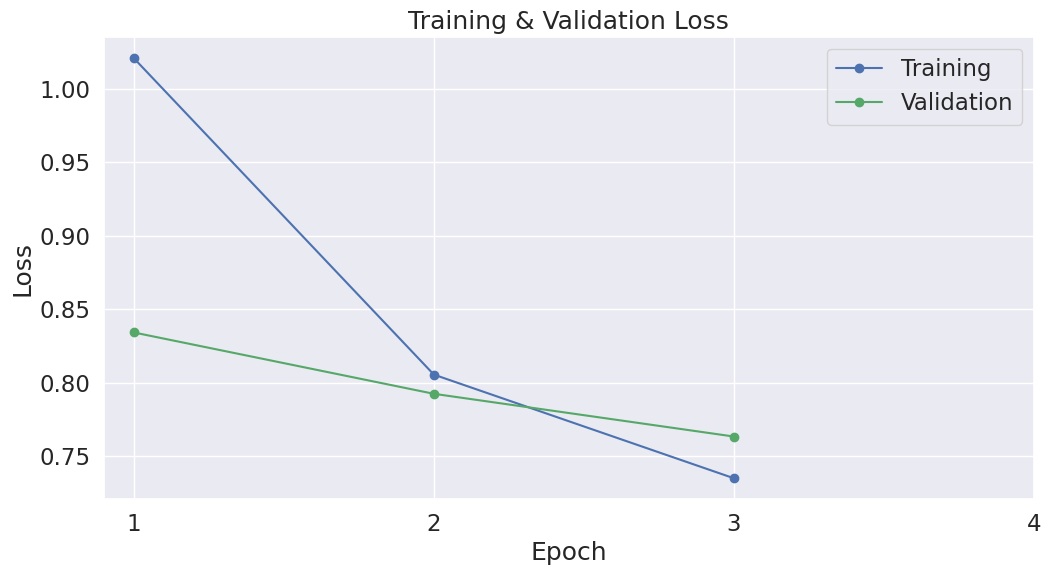

In [46]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()